In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
# Loading the MNIST dataset which contains images of handwritten digits
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

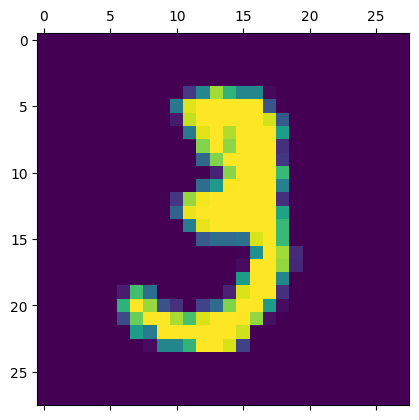

In [ ]:
plt.matshow(X_train[10])

In [ ]:
# Normalizing the data to scale the pixel values between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [ ]:
# Flattening of the data set to provide the model
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# Creating our first Sequential model with just one dense layer
model= keras.Sequential([

    # Adding the output layer with 10 neurons (one for each digit) and sigmoid activation function
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

# Compiling the model with Adam optimizer and sparse categorical crossentropy loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Training the model on the training data for 5 epochs
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4700 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9163
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9254


In [ ]:
#Evaluating the model on test data
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2704 - accuracy: 0.9245


[0.27041953802108765, 0.9244999885559082]

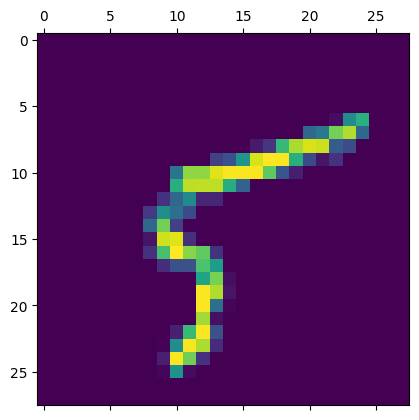

In [ ]:
plt.matshow(X_test[59])

In [ ]:
# Predicting the data on X_test
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.53684837e-02, 2.47580772e-07, 6.35762364e-02, 9.66539979e-01,
       2.90339417e-03, 1.02219045e-01, 9.57364023e-07, 9.99759674e-01,
       1.09357432e-01, 6.88625216e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[59])

5

In [102]:
# Selecting the maximum from the y_predicted
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
# Creating a confusion matrix
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   8,    9,  913,   20,    8,    2,   10,   11,   46,    5],
       [   2,    0,   14,  927,    0,   23,    2,   10,   25,    7],
       [   2,    1,    5,    2,  908,    0,    8,    3,    9,   44],
       [  11,    1,    5,   33,   11,  778,    8,    4,   34,    7],
       [  14,    3,    7,    2,    7,   23,  893,    2,    7,    0],
       [   1,    5,   20,   12,   10,    0,    0,  942,    2,   36],
       [   7,    6,    6,   19,    9,   23,    6,   11,  878,    9],
       [  11,    6,    1,   10,   25,    5,    0,   15,    7,  929]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

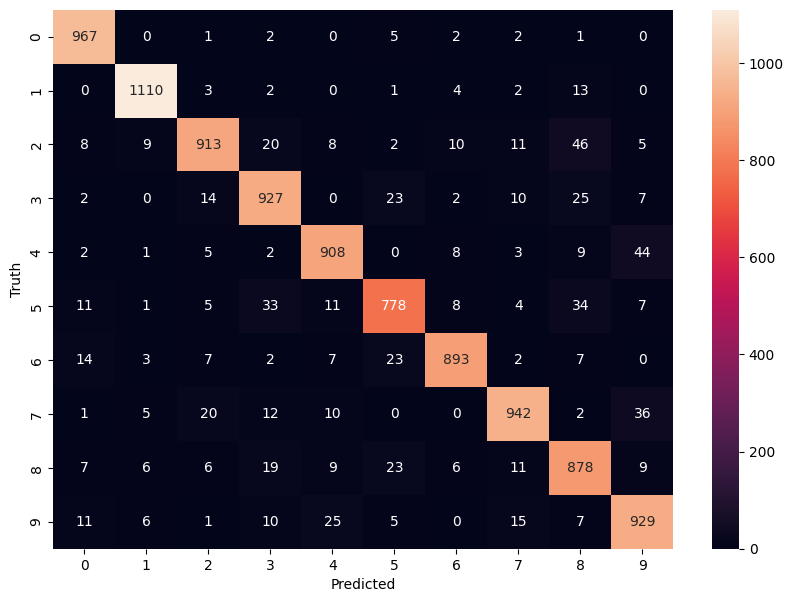

In [ ]:
# Visualising a confusion matrix with the help of seaborn
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Creating our Second Sequential model with two dense layer
model= keras.Sequential([

    # Adding two dense layers with activation function as relu
with activation function as sigmoid
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),

    # Adding an output layer With activation function as sigmoid
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2449 - accuracy: 0.9272
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1031 - accuracy: 0.9684
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9851


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9720


[0.08994128555059433, 0.972000002861023]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

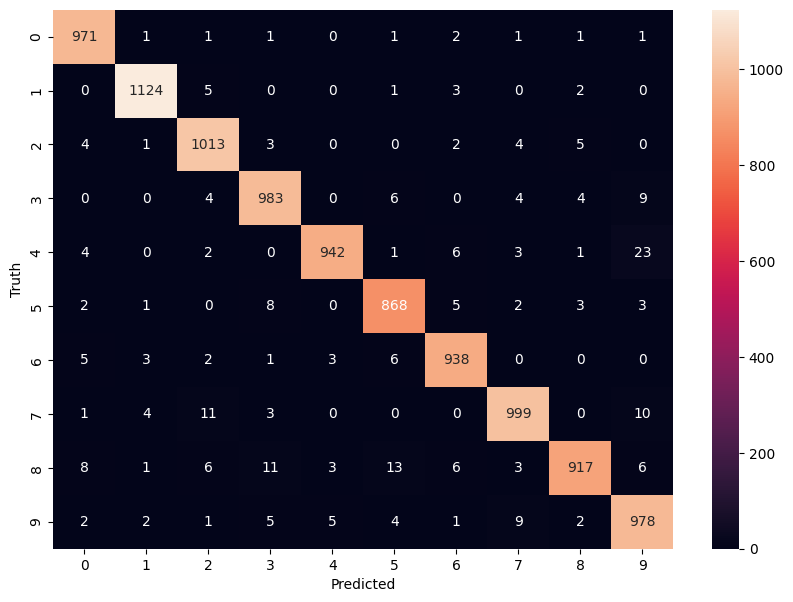

In [ ]:
# Again, predicting and creating a confusion matrix with the results to output are accuracy
y_predicted=model.predict(X_test_flattened)
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Creating our Third Sequential model With indluding a  flattened layer instead of giving the input_shape
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),

    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2500 - accuracy: 0.9254
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1052 - accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0746 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0561 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0449 - accuracy: 0.9857
